# About Data

- Scada Systems measure and save data for `10 minutes` interval
- **Columns in data:**
    - `Date/Time` (for 10 minutes intervals)
    - `LV ActivePower (kW)`: The power generated by the turbine for that moment
    - `Wind Speed (m/s)`: The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
    - `Theoretical_Power_Curve (KWh)`: The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
    - `Wind Direction (°)`: The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("T1.csv")

In [3]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
data1 = data.copy()
data1['Date/Time'] = pd.to_datetime(data1['Date/Time'], format='%d %m %Y %H:%M')
data[['Year', 'Month', 'Day', 'Hour']] = data1['Date/Time'].dt.strftime('%Y %m %d %H').str.split().tolist()
data[['Year', 'Month', 'Day', 'Hour']] = data[['Year', 'Month', 'Day', 'Hour']].astype(int)
data = data.drop(columns=['Year'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
 5   Month                          50530 non-null  int64  
 6   Day                            50530 non-null  int64  
 7   Hour                           50530 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.1+ MB


In [7]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Day,Hour
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,6.507956,15.626756,11.517356
std,1312.459242,4.227166,1368.018238,93.443736,3.409312,8.692104,6.934626
min,-2.471405,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437,4.000000,8.000000,5.000000
50%,825.838074,7.104594,1063.776283,73.712978,6.000000,16.000000,12.000000
75%,2482.507568,10.300020,2964.972462,201.696720,9.000000,23.000000,18.000000
max,3618.732910,25.206011,3600.000000,359.997589,12.000000,31.000000,23.000000


In [8]:
data.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Month                            0
Day                              0
Hour                             0
dtype: int64

In [9]:
data.duplicated().sum()

0

- **Comments:**
    - data is cleaned no duplicates and no missing values
    - data contains 5 columns; 4 of them are numbers and one of them is object
    - data contains 50530 rows

# Data Exploration

In [10]:
data.nunique()

Date/Time                        50530
LV ActivePower (kW)              38764
Wind Speed (m/s)                 50305
Theoretical_Power_Curve (KWh)    37157
Wind Direction (°)               50251
Month                               12
Day                                 31
Hour                                24
dtype: int64

In [11]:
for col in data.columns[1:5]:
    print(str(data[col].value_counts()))
    print("-----------------------------------------")

LV ActivePower (kW)
0.000000       10781
3602.670898        5
3602.268066        5
3603.145996        5
3602.216064        5
               ...  
3135.654053        1
3223.466064        1
2877.299072        1
2619.701904        1
2820.466064        1
Name: count, Length: 38764, dtype: int64
-----------------------------------------
Wind Speed (m/s)
0.000000     10
6.112818      3
10.630920     3
11.438890     3
12.992470     2
             ..
3.063829      1
2.433669      1
2.148074      1
2.904742      1
9.979332      1
Name: count, Length: 50305, dtype: int64
-----------------------------------------
Theoretical_Power_Curve (KWh)
0.000000       7749
3600.000000    5454
3406.349668       3
3125.949347       3
662.711645        3
               ... 
924.994100        1
1215.522996       1
945.678903        1
1379.337345       1
2779.184096       1
Name: count, Length: 37157, dtype: int64
-----------------------------------------
Wind Direction (°)
0.000000      75
214.885101     3
203.

# Outliers

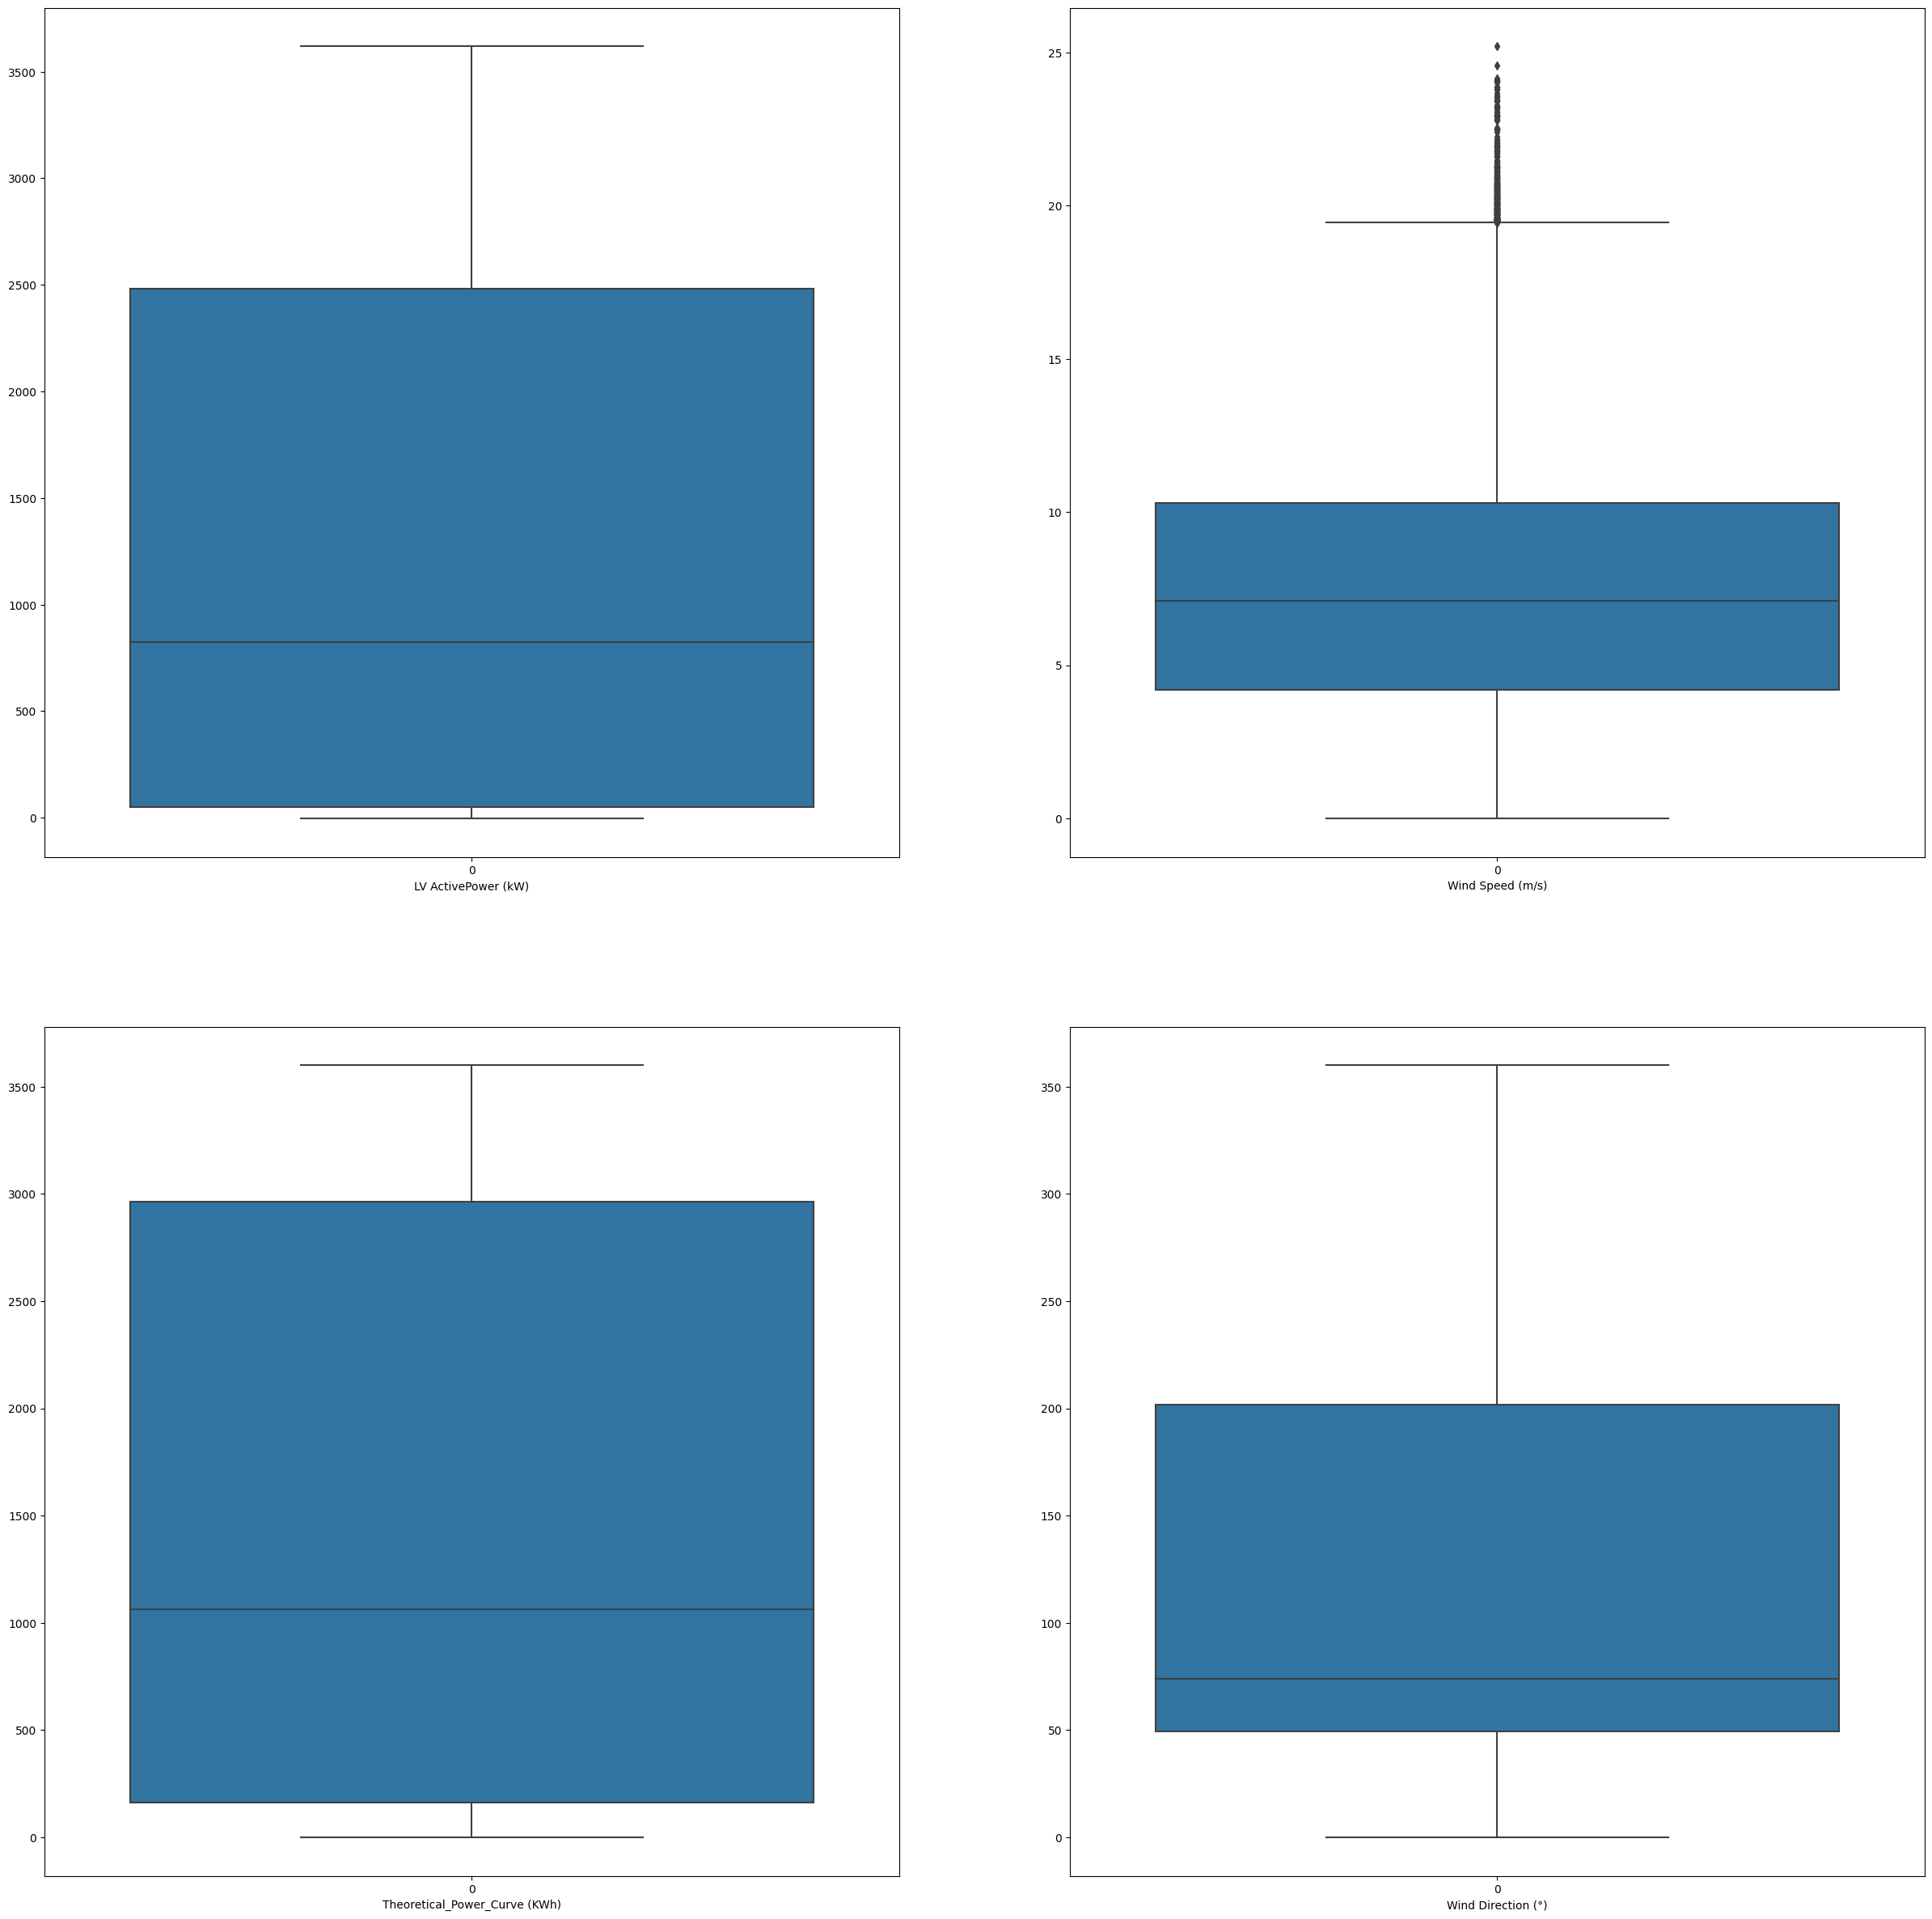

In [12]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in data.columns[1:5]:
    sub = fig.add_subplot(2,2,counter+1)
    g = sns.boxplot(data=data[col])
    plt.xlabel(col)
    counter = counter + 1

In [13]:
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [14]:
# Calculate and store outlier counts and percentages
outlier_data = {}
for col in data.columns[1:5]:
    outliers = detect_outliers(data[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(data[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}
    
    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

LV ActivePower (kW)
No. of IQR-based outliers: 0
--------------------------------
Wind Speed (m/s)
No. of IQR-based outliers: 423
--------------------------------
Theoretical_Power_Curve (KWh)
No. of IQR-based outliers: 0
--------------------------------
Wind Direction (°)
No. of IQR-based outliers: 0
--------------------------------


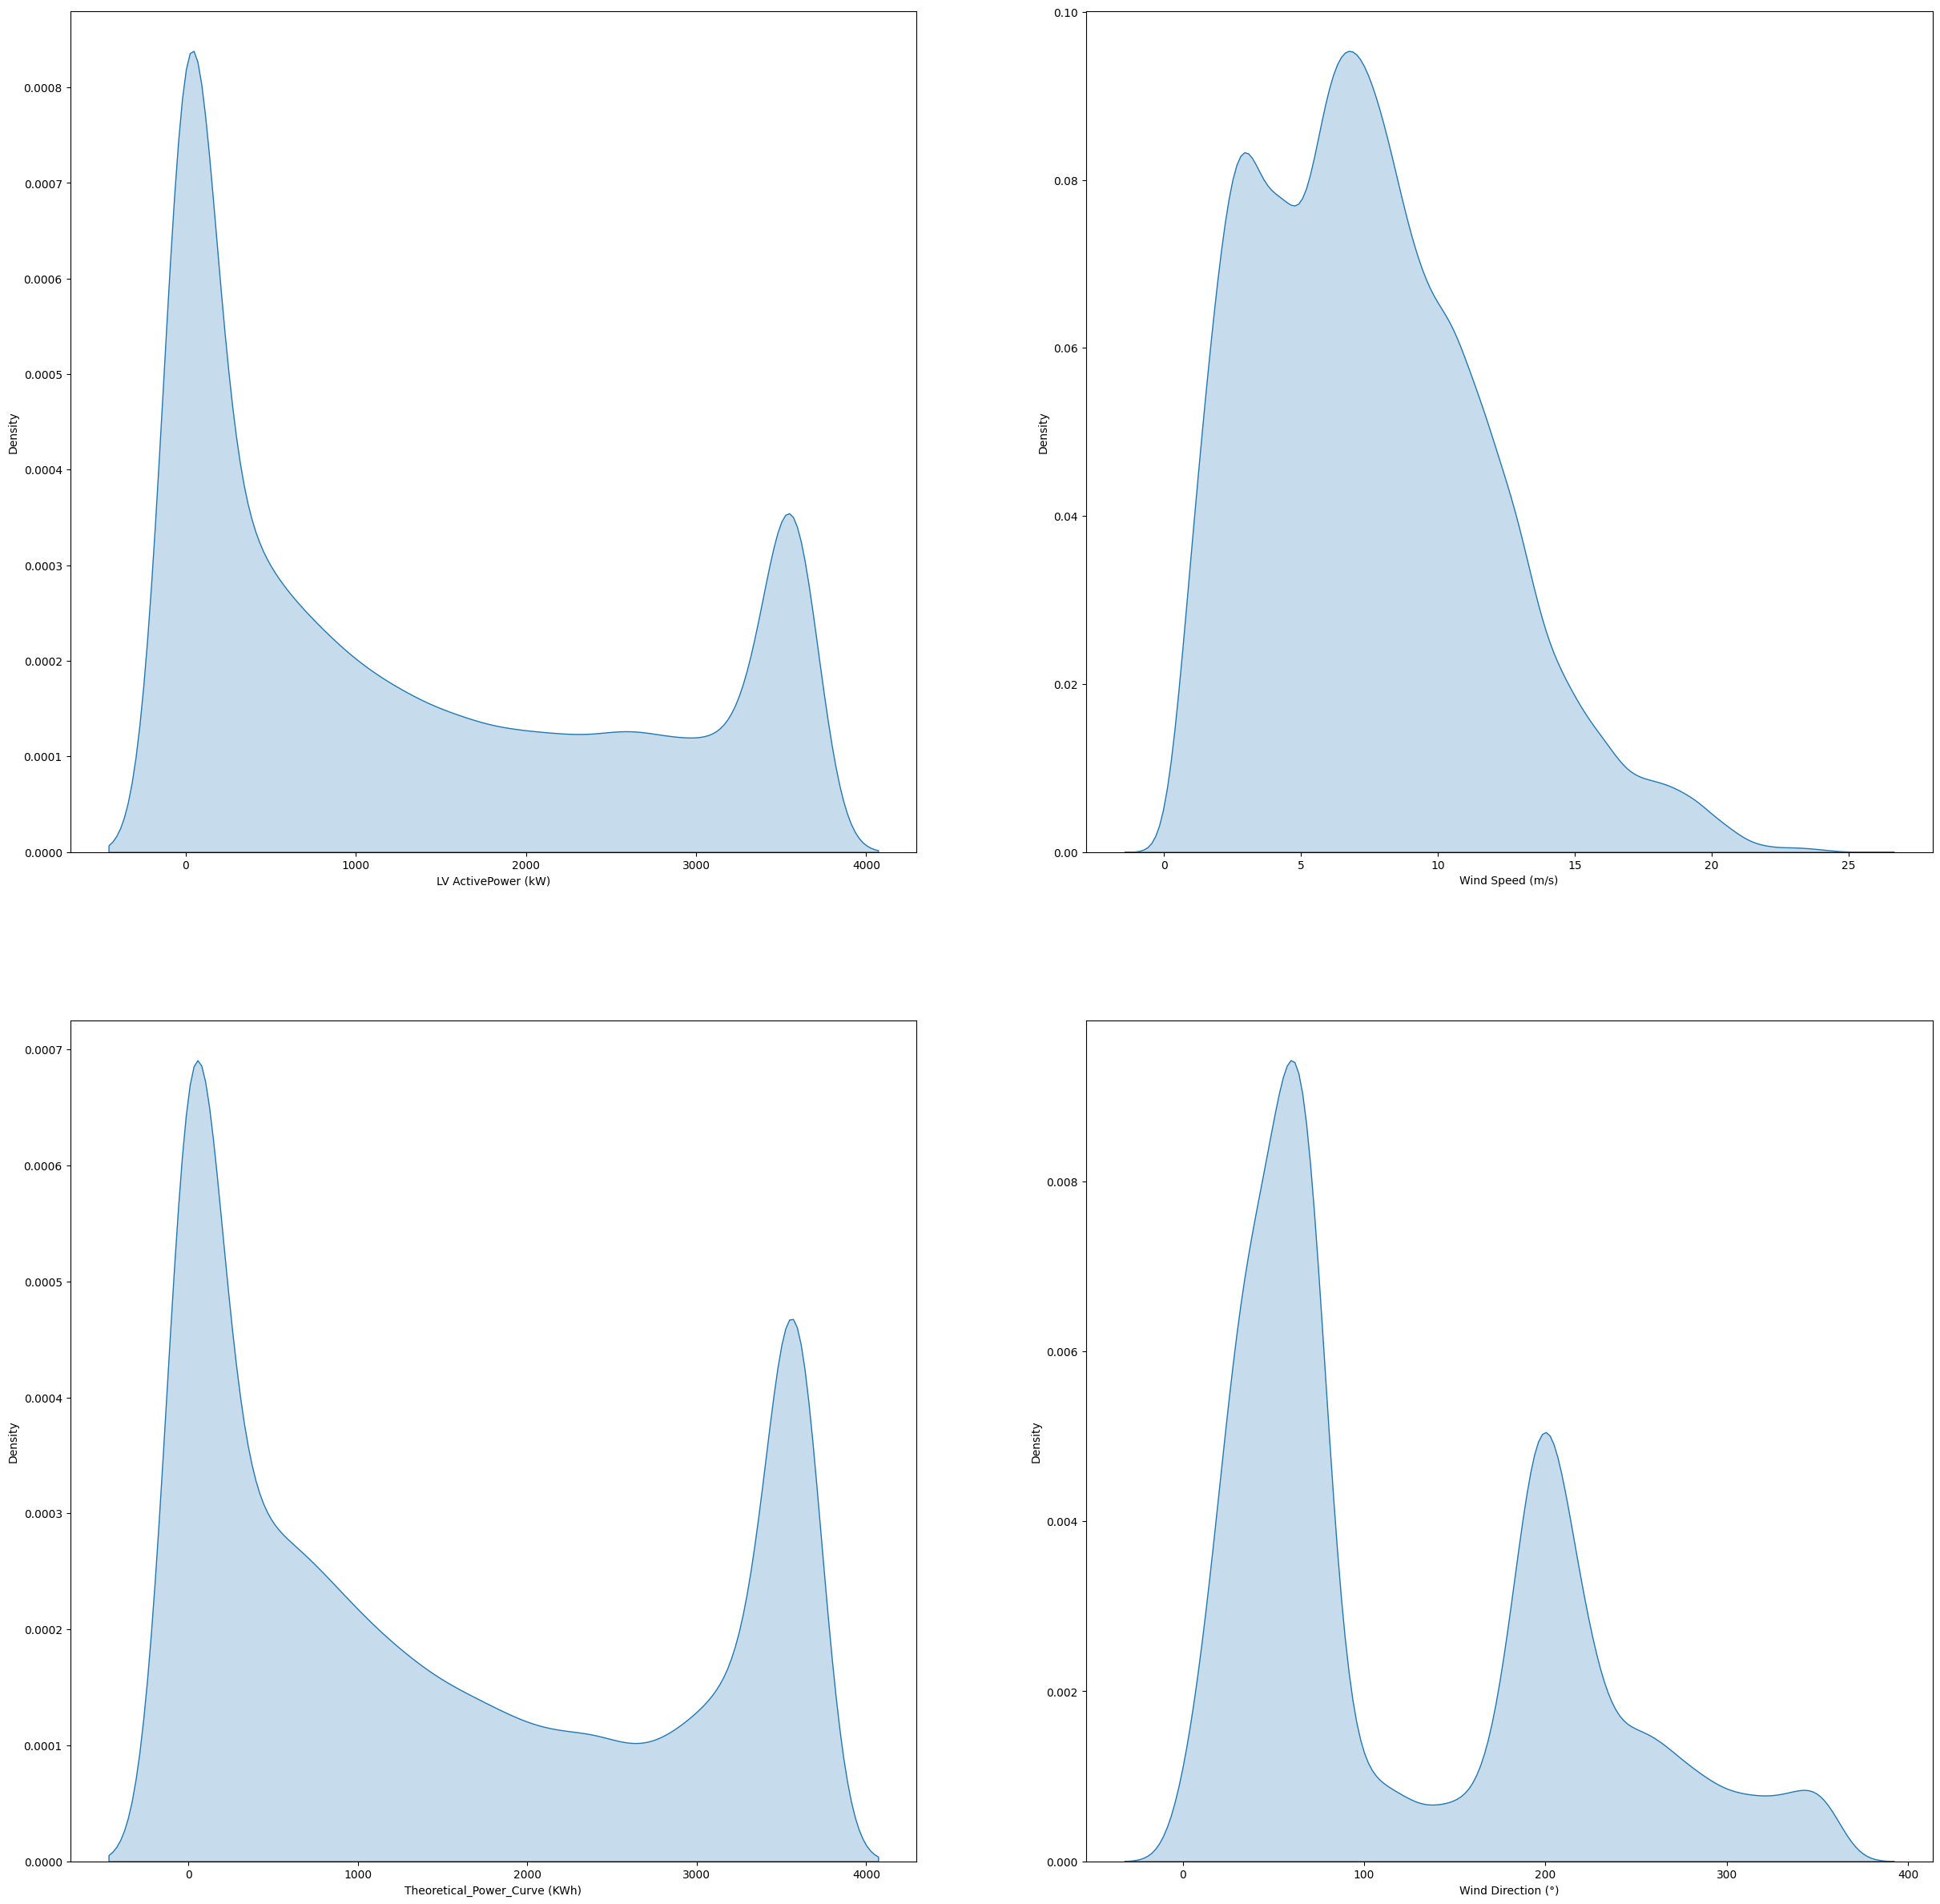

In [15]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in data.columns[1:5]:
    sub = fig.add_subplot(2,2,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True)
    plt.xticks()
    counter = counter + 1

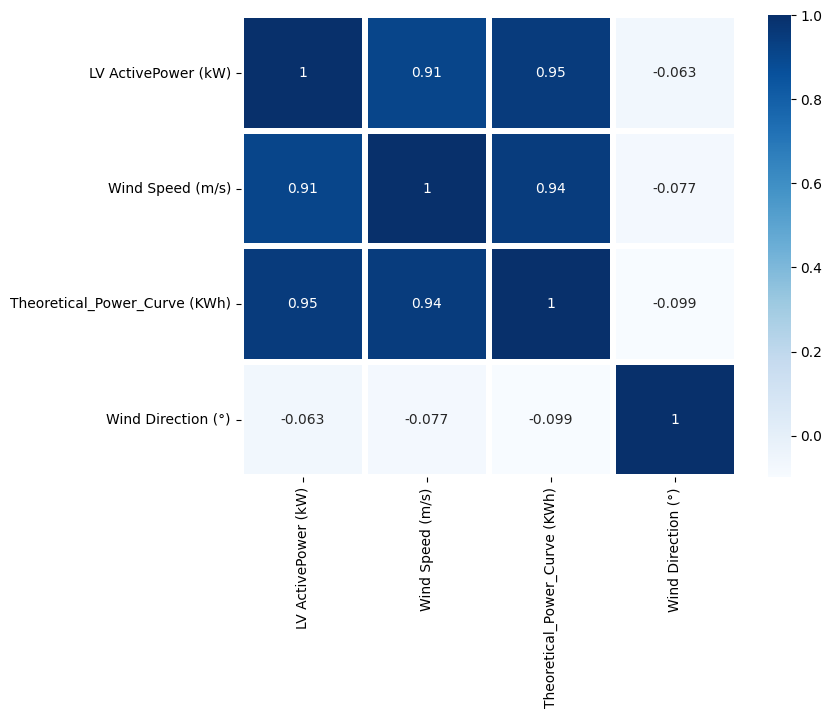

In [16]:
plt.figure(figsize = (8,6))

sns.heatmap(data[data.select_dtypes("float64").columns].corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()

# EDA

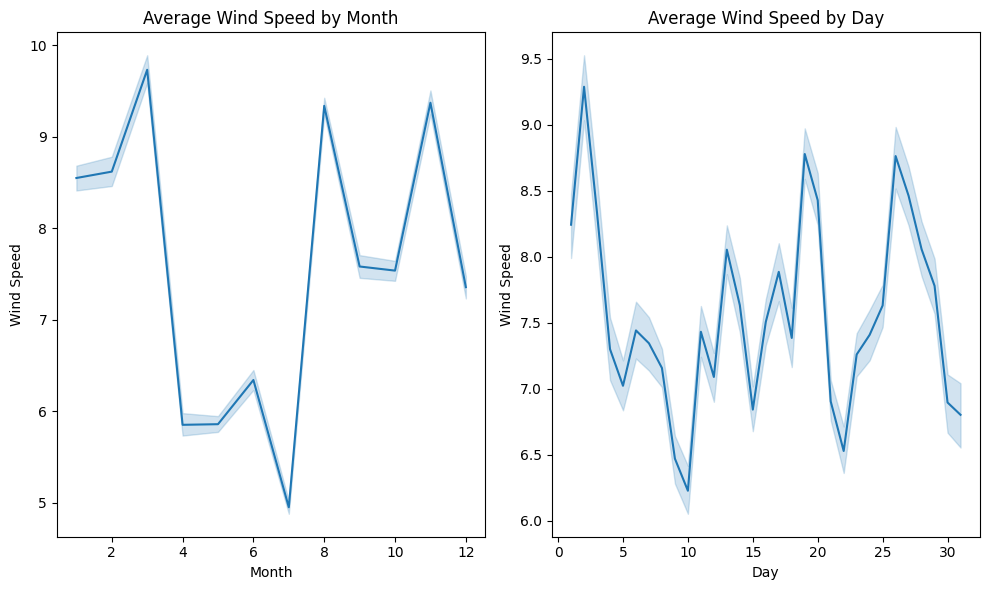

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.lineplot(x=data['Month'], y=data['Wind Speed (m/s)'], ax=ax1)
ax1.set_xlabel("Month")
ax1.set_ylabel("Wind Speed")
ax1.set_title("Average Wind Speed by Month")

sns.lineplot(x=data['Day'], y=data['Wind Speed (m/s)'], ax=ax2)
ax2.set_xlabel("Day")
ax2.set_ylabel("Wind Speed")
ax2.set_title("Average Wind Speed by Day")

plt.tight_layout()
plt.show()

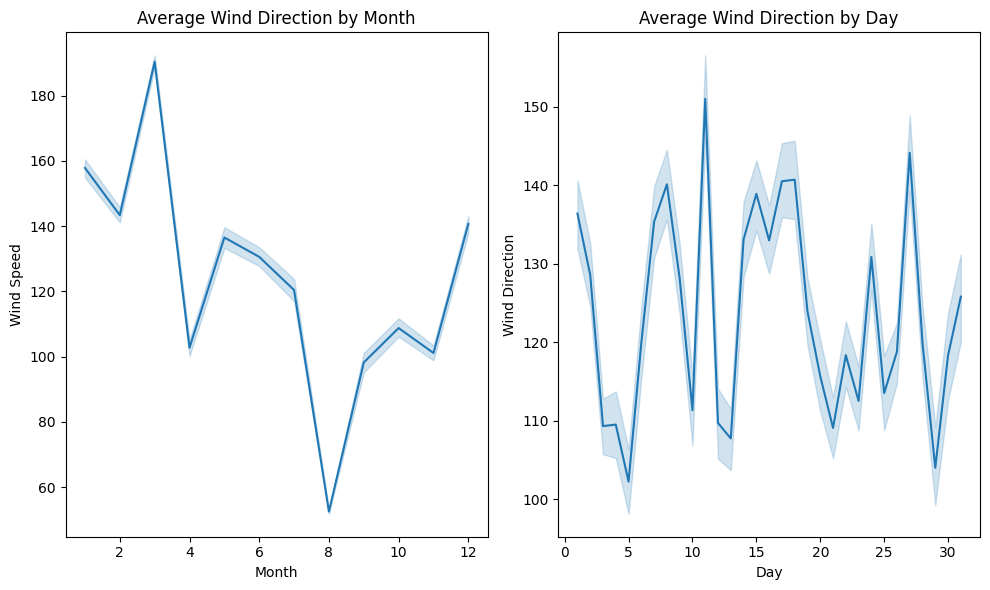

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.lineplot(x ='Month' , y = 'Wind Direction (°)', data = data, ax=ax1)
ax1.set_xlabel("Month")
ax1.set_ylabel("Wind Speed")
ax1.set_title("Average Wind Direction by Month")

sns.lineplot(x=data['Day'], y=data['Wind Direction (°)'], ax=ax2)
ax2.set_xlabel("Day")
ax2.set_ylabel("Wind Direction")
ax2.set_title("Average Wind Direction by Day")

plt.tight_layout()
plt.show()

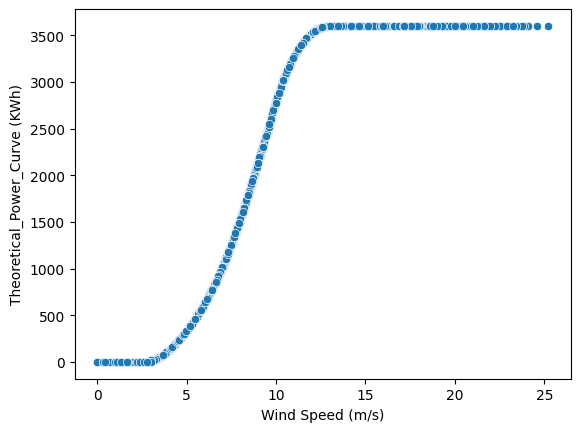

In [19]:
sns.scatterplot(y ='Theoretical_Power_Curve (KWh)' , x = 'Wind Speed (m/s)' , data = data )
plt.show()

# Modeling

In [20]:
# tools
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# models
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [21]:
X = data.drop(columns=["LV ActivePower (kW)","Theoretical_Power_Curve (KWh)", "Date/Time"])
y = data["LV ActivePower (kW)"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (40424, 5)
The Shape of y_train is : (40424,)
The Shape of X_test is : (10106, 5)
The Shape of y_test is : (10106,)


# preprocessing

In [23]:
num_cols = [col for col in X.columns if X[col].dtype != 'object']
print(num_cols)

['Wind Speed (m/s)', 'Wind Direction (°)', 'Month', 'Day', 'Hour']


In [24]:
sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [25]:
X_train

,Wind Speed (m/s),Wind Direction (°),Month,Day,Hour
13791,-1.125253,0.600542,-0.738439,-0.533974,-0.800917
46267,-0.614677,-0.007299,1.605546,-1.569184,-0.800917
42105,1.220175,0.937698,1.019550,1.651468,0.928508
21123,-0.111835,-0.744266,-0.152443,-1.684207,-0.368561
11823,-0.304133,-0.869168,-1.031437,1.421421,0.352033
...,...,...,...,...,...
11284,-0.728182,0.695641,-1.031437,0.961328,1.216745
44732,-0.028267,0.547178,1.312548,0.616258,0.352033
38158,0.368732,-0.643206,0.726552,1.421421,0.352033
860,1.121573,0.881629,-1.617433,-0.994067,-1.377392


# Feature Importance

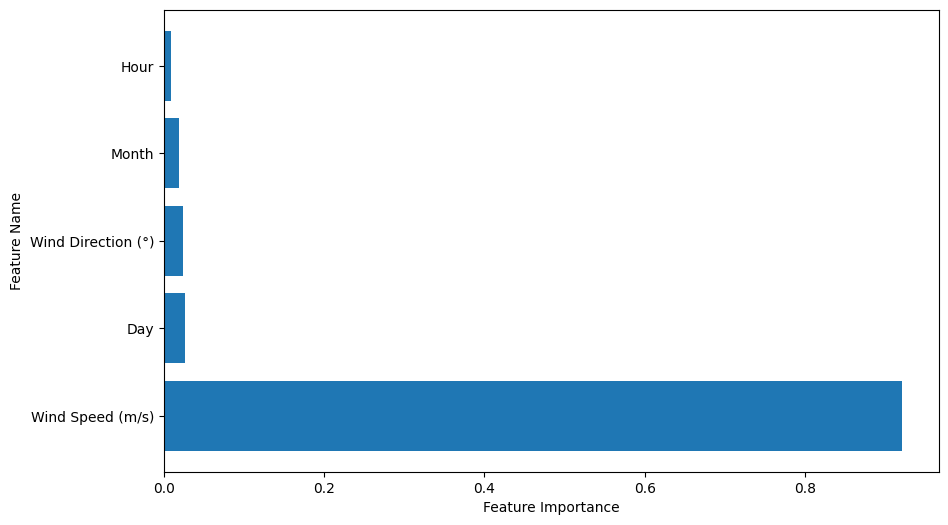

In [26]:
# Create and train a Random Forest classifier
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
# plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
# plt.title('Feature Importance')
plt.show()

# Models

In [27]:
model_name= []
RMSE = []
R2_score = []

models = [
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    LinearRegression(),
    XGBRegressor(random_state = 42),
    ExtraTreesRegressor(random_state=42)
]

for model in models :
    model.fit(X_train , y_train)
    
    prediction = model.predict(X_test)
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error( prediction , y_test, squared=False )))
    R2_score.append(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [28]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,R2_Score
Model-Name,,
XGBRegressor,190.86695465567294,97.86497435017435 %
ExtraTreesRegressor,192.72824868637903,97.82313068089711 %
RandomForestRegressor,215.44288954784295,97.27976803931561 %
DecisionTreeRegressor,276.9314411529845,95.50545078837452 %
GradientBoostingRegressor,303.6309482371135,94.59701601576107 %
LinearRegression,537.6191916877874,83.06086865316797 %


`XGBRegressor` Model is the best one

# Prediction Visualization

In [29]:
data_new = pd.DataFrame({'LV ActivePower (kW)': y_test})
data_new['Predictions'] = prediction
data_new["Theoretical_Power_Curve (KWh)"] = data["Theoretical_Power_Curve (KWh)"]

data_new.head()

,LV ActivePower (kW),Predictions
8057,3348.910889,3080.377100
8059,2647.506104,2764.695933
50250,0.000000,35.829089
14774,1334.573975,1352.768262
49374,533.002808,509.376842


# Plotting Prediction, Real and Theoritical Power

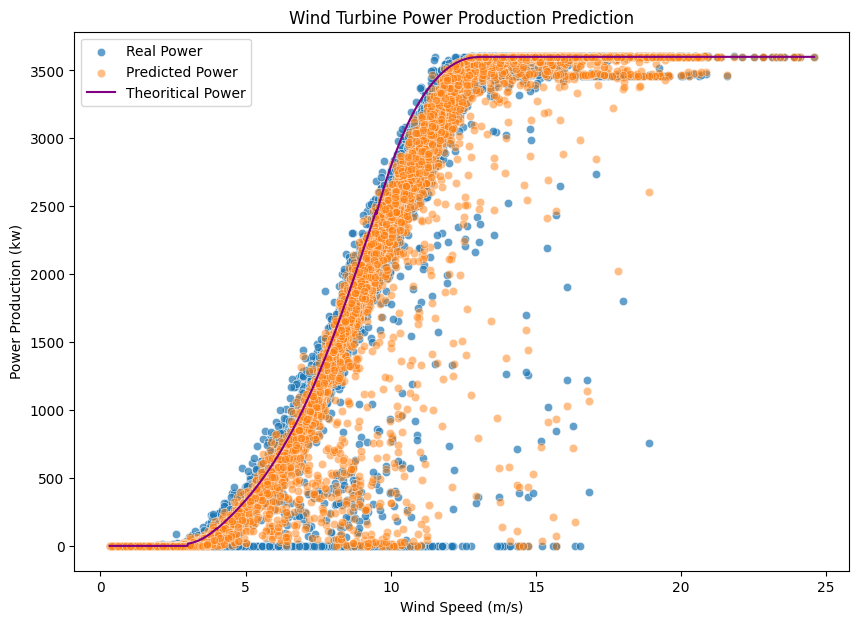

In [36]:
# Visualizing real, theoritical and predicted power production
plt.figure(figsize=(10,7))
sns.scatterplot(x=data['Wind Speed (m/s)'], y=data_new['LV ActivePower (kW)'],alpha=0.7, label= 'Real Power')
sns.scatterplot(x=data['Wind Speed (m/s)'], y=data_new['Predictions'], alpha=0.5, label='Predicted Power', marker='o')
sns.lineplot(x=data['Wind Speed (m/s)'], y=data_new["Theoretical_Power_Curve (KWh)"], label='Theoritical Power',color='purple')
plt.title('Wind Turbine Power Production Prediction')
plt.ylabel('Power Production (kw)')
plt.legend();

the model fits better to the **real** power production, than the **theoritical** power production curve.